In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from src.results_paper import *


In [2]:
savepath = "../results_paper_SOP/"
create_folder(savepath)

Folder already exists: ../results_paper_SOP/


## <b> FIGURE 1 </b>

$P_0 = 100$ (seeds)  
$p_0 = 1.0$ (initial probability)  
Network $1000$ x $1000$ -> $L$ x $N_{samples}$  
$L = 1000$  
$N_{samples} = 1000$  
$k = 10^{-5}$  
$N_T = 200$


In [3]:
path = "../Data/bond_percolation/dim_2/L_1000_N_samples_1000/NT_constant/NT_200/k_1.0e-05/network/"
filename = list_npz_files()
print(filename)
#plot_bond_network(path + filename, savepath=savepath + "Fig1.pdf", dpi=600, min_density=1)

['P0_0.01_p0_1.00_seed_1158880450.npz', 'P0_0.01_p0_1.00_seed_1696102670.npz', 'P0_0.01_p0_1.00_seed_975312511.npz', 'P0_0.01_p0_1.00_seed_1024524560.npz', 'P0_0.01_p0_1.00_seed_1587946059.npz', 'P0_0.01_p0_1.00_seed_1257360492.npz', 'P0_0.01_p0_1.00_seed_1672255719.npz']


## <b> FIGURE 2 </b>

Network $2000$ x $2000$ -> $L$ x $N_{samples}$  
$L = 2000$  
$N_{samples} = 2000$  
$k = 10^{-4}$  
$N_T = 200$  
$P_0 = 100$ (seeds)  

(a)  
$p_0 = [0.4, 0.8, 1.0]$ (initial probability)  

(b)  
$p_0 = [0.3, 0.7, 1.0]$ (initial probability)  

In [4]:
L = 2000
N_samples = 2000
k = 1.0e-04
Nt = 200
dim = 2
prop = "Pt"
type_Nt = 0

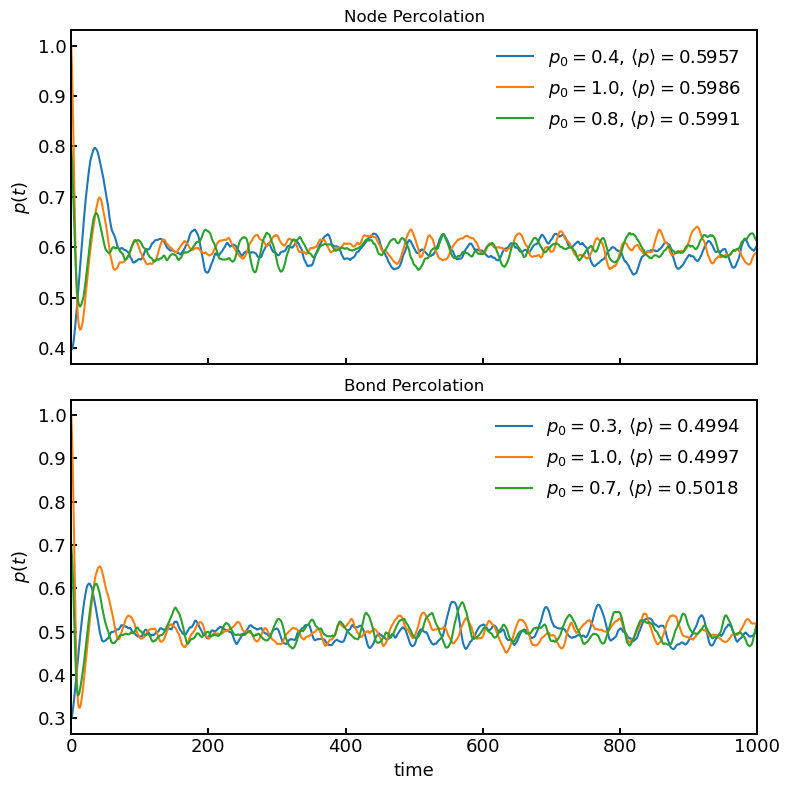

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)


colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fontsize_ticks = 13
thickness = 1.4
# --- Node Percolation ---
type_percolation_node = "node"
prop_node_names = list_npy_files(type_percolation_node, dim, L, N_samples, type_Nt, Nt, k, prop)
p_0_node = [0.4, 0.8, 1.0]

count = 0

for prop_ in prop_node_names:
    p_0 = os.path.basename(prop_)[11:14]
    if(float(p_0) in p_0_node):
        t, pt = load_t_pt(prop_)
        p_m = np.mean(pt[200:])
        
        axs[0].plot(t, pt, label=f"$p_0 = {p_0}$, $\\langle p \\rangle =${p_m:.4f}",color=colors[count])
        count += 1

axs[0].set_title("Node Percolation")
axs[0].legend(framealpha=0.0,fontsize=fontsize_ticks)
axs[0].set_xlim([0, 1000])
axs[0].set_ylabel("$p(t)$",fontsize=fontsize_ticks)
axs[0].tick_params(axis='both', labelsize=fontsize_ticks, width=thickness, length = 4.0, direction='in')
# Define a espessura das bordas
for spine in axs[0].spines.values():
    spine.set_linewidth(thickness)

# --- Bond Percolation ---
type_percolation_bond = "bond"
prop_bond_names = list_npy_files(type_percolation_bond, dim, L, N_samples, type_Nt, Nt, k, prop)
p_0_bond = [0.3, 0.7, 1.0]
count = 0
for prop_ in prop_bond_names:
    p_0 = os.path.basename(prop_)[11:14]
    if(float(p_0) in p_0_bond):
        t, pt = load_t_pt(prop_)
        p_m = np.mean(pt[200:])
        
        axs[1].plot(t, pt, label=f"$p_0 = {p_0}$, $\\langle p \\rangle =${p_m:.4f}", color=colors[count])
        count += 1

axs[1].set_title("Bond Percolation")
axs[1].legend(framealpha=0.0,fontsize=fontsize_ticks)
axs[1].set_xlim([0, 1000])
axs[1].set_xlabel("time",fontsize=fontsize_ticks)
axs[1].set_ylabel("$p(t)$",fontsize=fontsize_ticks)
axs[1].tick_params(axis='both', labelsize=fontsize_ticks, width=thickness, length = 4.0, direction='in')
# Define a espessura das bordas
for spine in axs[1].spines.values():
    spine.set_linewidth(thickness)

plt.tight_layout()
plt.show()
